## IMPORT LIBIRIES

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

## DATA GATHERNING

In [ ]:
# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

data=pd.read_csv(path+"/heart.csv")


Path to dataset files: /kaggle/input/heart-disease-dataset


## data Understanding

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


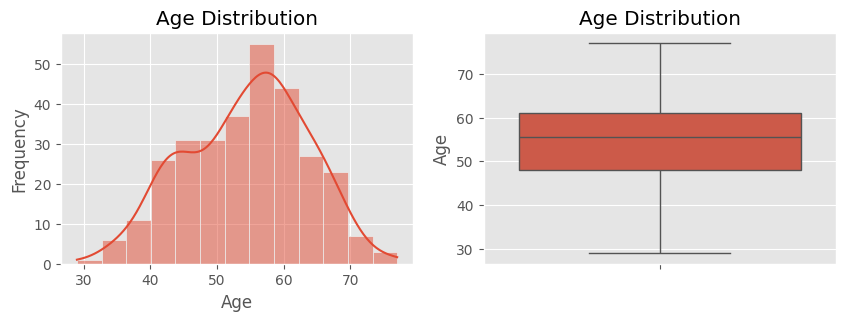

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))  # 1 row, 2 columns

# Histogram on the first subplot (axes[0])
sns.histplot(data["age"], kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# Box plot on the second subplot (axes[1])
sns.boxplot(data["age"], ax=axes[1])
axes[1].set_title("Age Distribution")
axes[1].set_ylabel("Age")
plt.show()

In [ ]:
data['sex'].value_counts()

,count
sex,
1,206
0,96


In [ ]:
types={0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'}
coll=data['cp'].apply(lambda x:types[x])

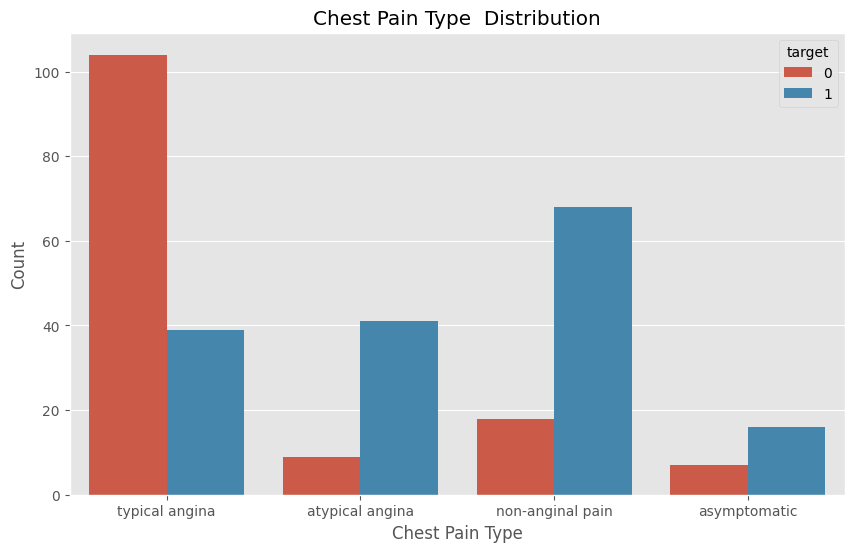

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=coll, data=data,hue='target')
plt.title('Chest Pain Type  Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

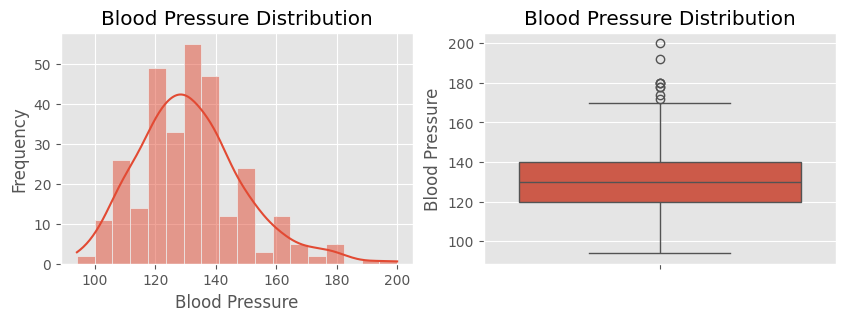

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(data["trestbps"], kde=True, ax=axes[0])
axes[0].set_xlabel("Blood Pressure")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Blood Pressure Distribution")

sns.boxplot(data["trestbps"], ax=axes[1])
axes[1].set_title("Blood Pressure Distribution")
axes[1].set_ylabel("Blood Pressure")
plt.show()

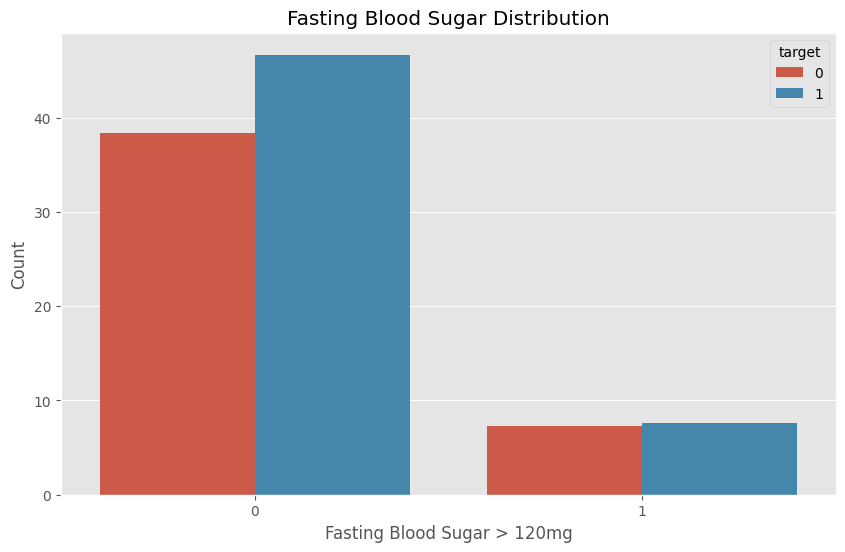

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['fbs'],data=data,hue='target',stat="percent")
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120mg')
plt.ylabel('Count')
plt.show()

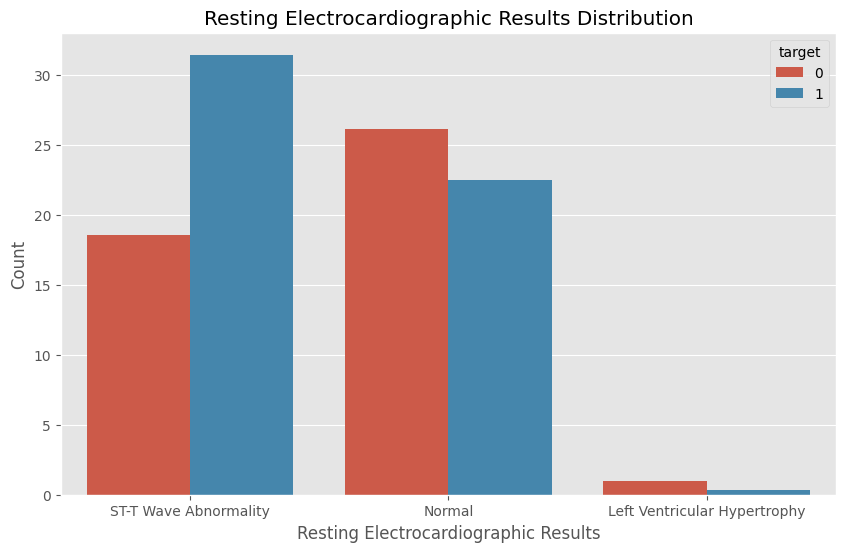

In [ ]:
plt.figure(figsize=(10,6))
temp=data['restecg'].apply(lambda x: 'Normal' if x==0 else 'ST-T Wave Abnormality' if x==1 else 'Left Ventricular Hypertrophy')
sns.countplot(x=temp,data=data,hue='target',stat="percent")
plt.title('Resting Electrocardiographic Results Distribution')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')
plt.show()

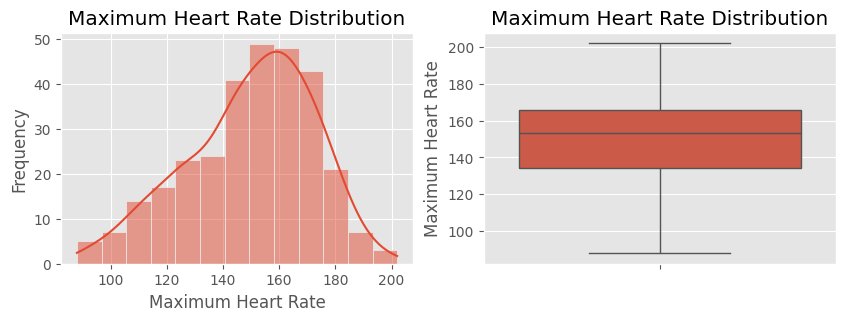

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,3))

sns.histplot(data['thalach'],kde=True,ax=axes[0])
axes[0].set_xlabel("Maximum Heart Rate")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Maximum Heart Rate Distribution")

sns.boxplot(data['thalach'],ax=axes[1])
axes[1].set_title("Maximum Heart Rate Distribution")
axes[1].set_ylabel("Maximum Heart Rate")
plt.show()

In [ ]:
IQR=data['thalach'].quantile(0.75)-data['thalach'].quantile(0.25)
Q1=data['thalach'].quantile(0.25)
Q3=data['thalach'].quantile(0.75)


data['thalach']=data.apply(lambda row :220-row['age'] if row['thalach']<Q1-1.5*IQR else row['thalach'],axis=1)

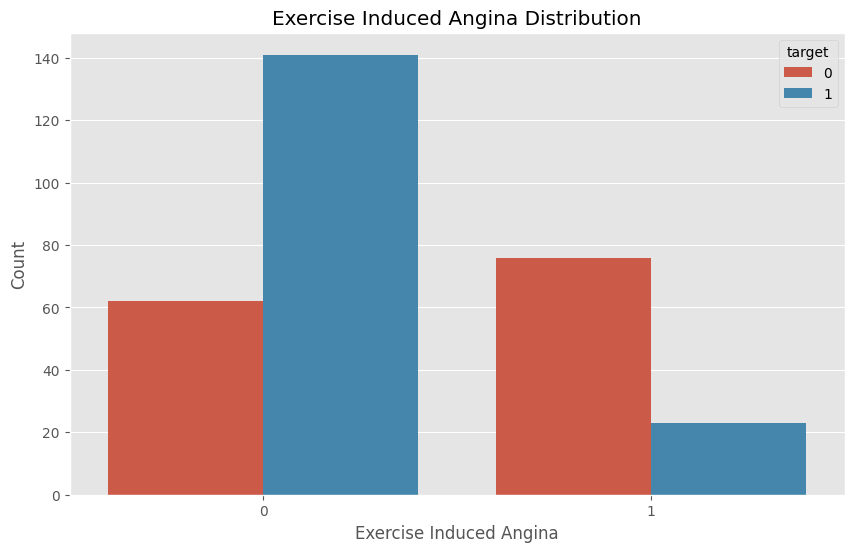

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['exang'],data=data,hue='target')
plt.title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.show()

In [ ]:
data['exang'].value_counts()

,count
exang,
0,203
1,99


Text(0.5, 0, 'Slope of the Peak Exercise ST Segment')

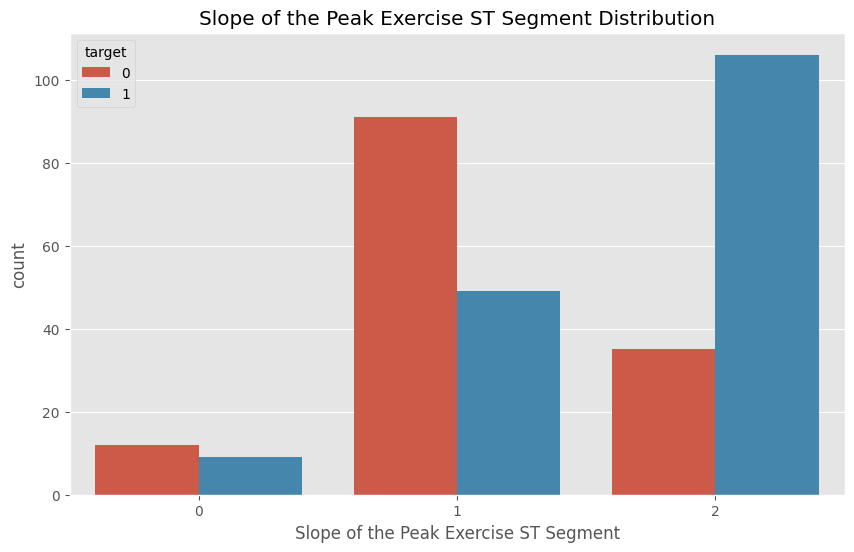

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['slope'],data=data,hue='target')
plt.title('Slope of the Peak Exercise ST Segment Distribution')
plt.xlabel('Slope of the Peak Exercise ST Segment')

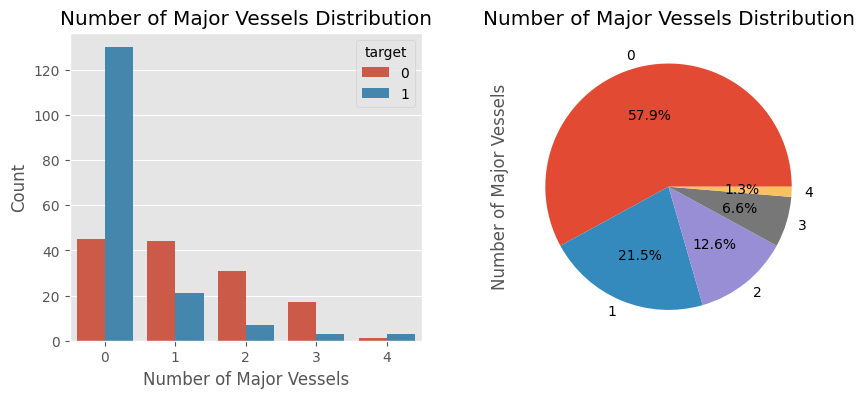

In [ ]:
fig, axes=plt.subplots(1,2,figsize=(10,4))

sns.countplot(x=data['ca'],data=data,hue='target',ax=axes[0])
axes[0].set_title('Number of Major Vessels Distribution')
axes[0].set_xlabel('Number of Major Vessels')
axes[0].set_ylabel('Count')

plt.pie(data['ca'].value_counts(),labels=data['ca'].value_counts().index,autopct='%1.1f%%')
axes[1].set_title('Number of Major Vessels Distribution')
axes[1].set_ylabel('Number of Major Vessels')
plt.show()

<Axes: >

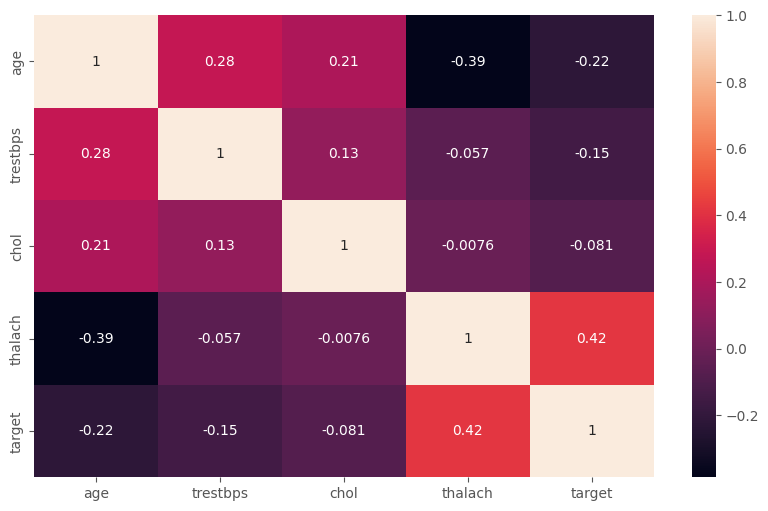

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['age','trestbps','chol','thalach','target']].corr(),annot=True)

## data prepartion

In [ ]:
data.dr

In [ ]:
x=data.drop(['target','chol'],axis=1)
y=data['target']

In [ ]:
from  sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## model selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



<Axes: >

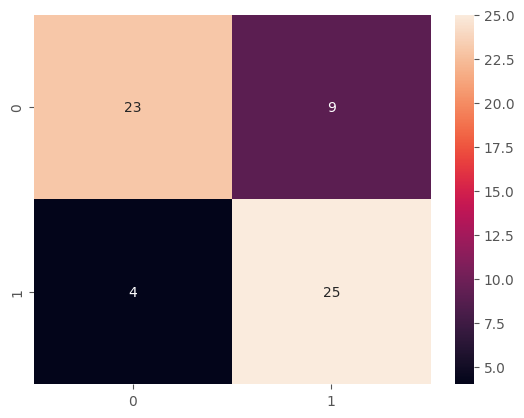

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

<Axes: >

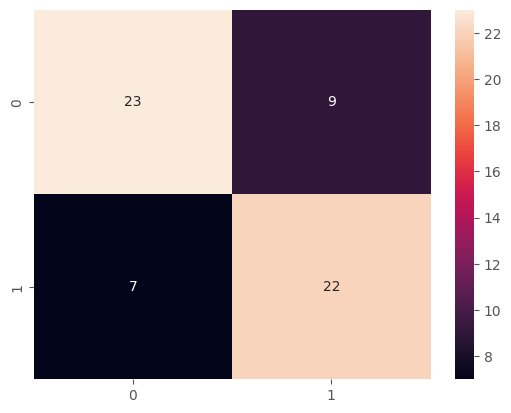

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.71      0.76      0.73        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

<Axes: >

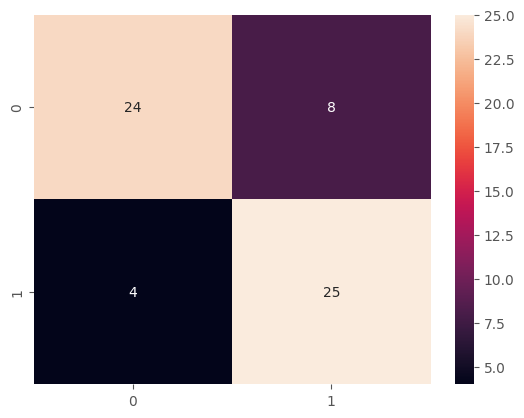

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

<Axes: >

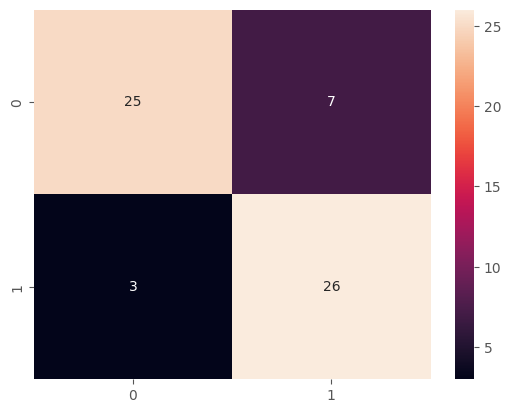

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



##Hypertuning params

In [ ]:
from sklearn.model_selection import GridSearchCV
param={
    'n_estimators':[10,50,100,200],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

grid=GridSearchCV(model,param,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [ ]:
y_pred=grid.predict(x_test)

In [ ]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(grid,f)